In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_file= '/content/drive/MyDrive/krishnaikEDA/titanic_train.csv'
df= pd.read_csv(data_file)

In [ ]:
df.set_index(df.PassengerId,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Identify Target and Predictor variables

In [ ]:
y= df['Survived']

In [ ]:
x= df.loc[:,df.columns != 'Survived']

In [ ]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Univariate Analysis
- Method to perform univariate analysis will depend on the variable type which is categorical or continuous.

### Continuous Variable Analysis


*   Measure of central tendency (Mean,Median,Mode) of variable.
*   Measure of spread(Range, IQR, Variance, Standard Deviation) of variable.
* Measure of Shape( Type of distribution , left or right skewed, Kurtosis(Shape of the distribution in terms of height or flatness)

### Categorical Variable Analysis 

* For this, Frequency distribution of each category would be used, for example Barchart, pie chart,countplot.



In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.Survived.value_counts()/ len(df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

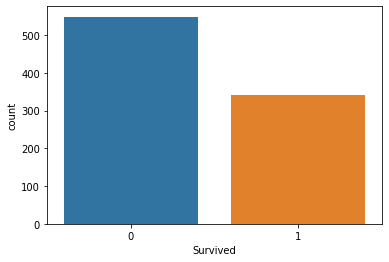

In [ ]:
sns.countplot(x= df.Survived)

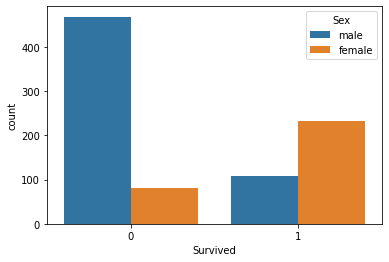

In [ ]:
sns.countplot(x=df.Survived, hue=df.Sex, data= df)

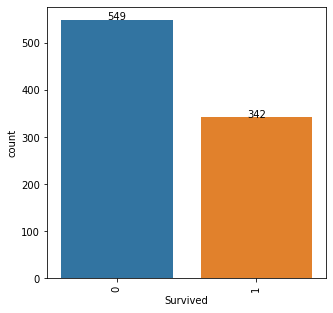

In [ ]:
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Survived', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df.Pclass.unique()

array([3, 1, 2])

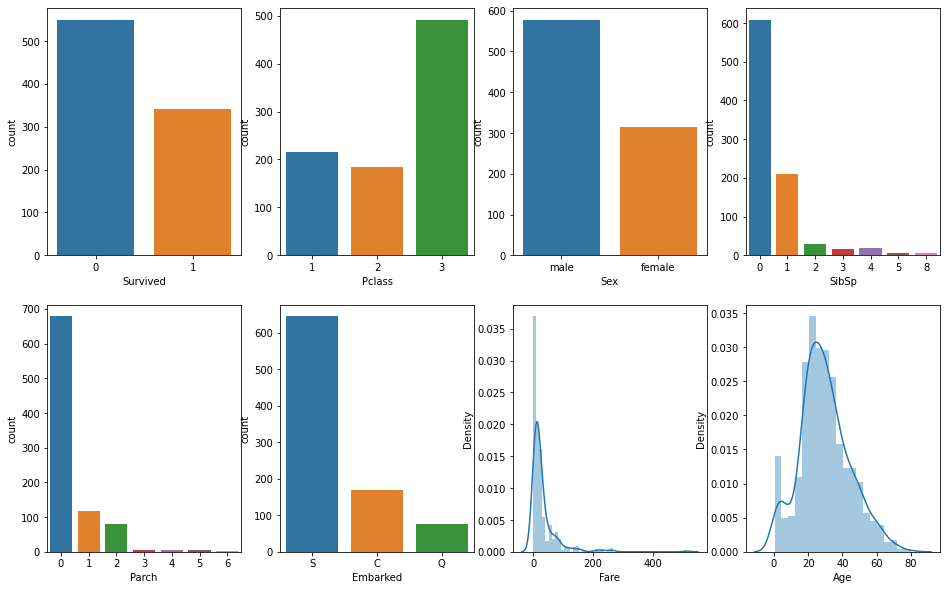

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig,axes= plt.subplots(2,4,figsize=(16,10))
sns.countplot(x=df.Survived,ax=axes[0,0])
sns.countplot(x=df.Pclass,ax=axes[0,1])
sns.countplot(x=df.Sex,ax=axes[0,2])
sns.countplot(x=df.SibSp,ax=axes[0,3])
sns.countplot(x=df.Parch,ax=axes[1,0])
sns.countplot(x=df.Embarked,ax=axes[1,1])
sns.distplot(df.Fare,kde=True, ax=axes[1,2])
sns.distplot(df.Age.dropna(),kde=True,ax=axes[1,3])


### Bivariate Analysis
- Can combine categorical & categorical fields, categorical and continuous field, continuous and continuos field.

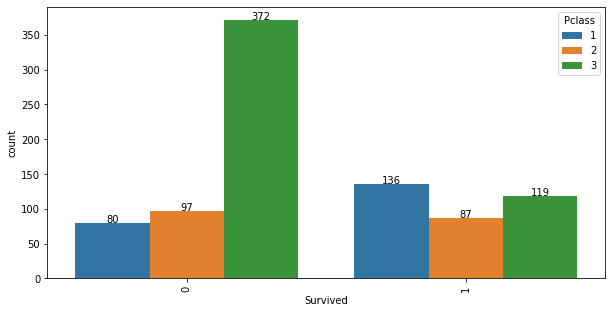

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='Survived',hue='Pclass', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

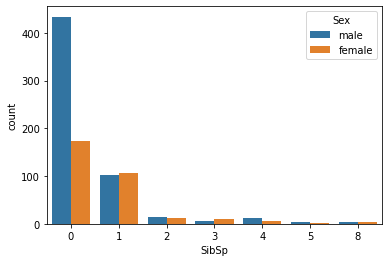

In [ ]:
sns.countplot(x=df.SibSp, hue= df.Sex)

In [ ]:
df.groupby('SibSp').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,606
1,209,209,209,209,209,183,209,209,209,69,209
2,28,28,28,28,28,25,28,28,28,6,28
3,16,16,16,16,16,12,16,16,16,3,16
4,18,18,18,18,18,18,18,18,18,0,18
5,5,5,5,5,5,5,5,5,5,0,5
8,7,7,7,7,7,0,7,7,7,0,7


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


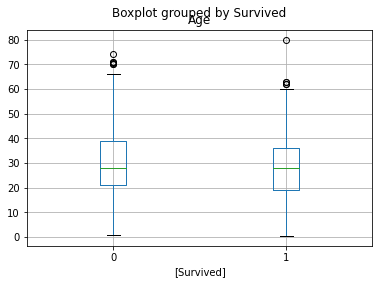

In [ ]:
df.boxplot(column=["Age"],by=["Survived"])

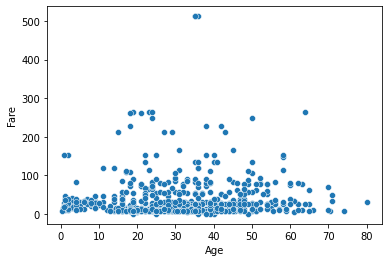

In [ ]:
sns.scatterplot(x=df.Age,y=df.Fare)

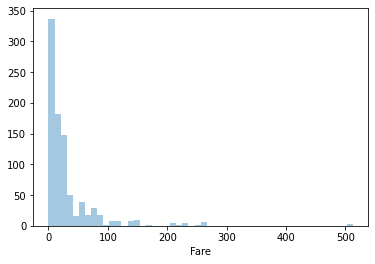

### Multivariate Analysis
- More than 2 variables are used.
- Different methods are used to tackle to these combinations.

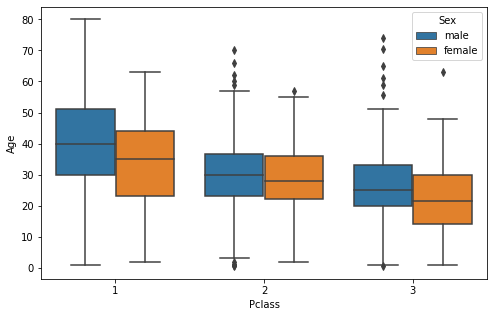

In [ ]:
fig, ax1= plt.subplots(figsize=(8,5))
tPlot= sns.boxplot(x=df.Pclass,y=df.Age,hue=df.Sex)

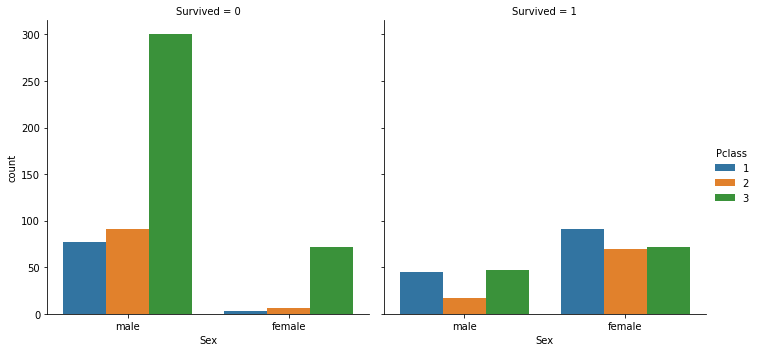

In [ ]:
sns.catplot(x='Sex', col='Survived',hue= 'Pclass',kind='count',data= df)

In [ ]:
df.duplicated().sum()

0

In [ ]:
percent_missing= df.isna().sum() / len(df)
missing_value= pd.DataFrame({'column_name': df.columns,
                             'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,0.198653
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
